# Lab 2 -- advection-diffusion equation

## Tomasz Ogiołda

## Problem statement

How to describe the concentration $c(x,t)$ of a substance over space $x$ and time $t$?

## Mathematical model of advection-diffusion

The concentration ($kg/m^3$) at position $x$ and time  $t$:

$c(x,t) = \frac{M}{A} \cdot \frac{1}{\sqrt{4\pi D}} \cdot \exp{[-\frac{(vt - x)^2}{4Dt}]}$

Where:

- $\frac{M}{A}$
  - $M$, is a total mass of the substance ($kg$), representing the amount initially present,
  - $A$, is the cross-sectional area ($m^2$), normalizing the mass over the area of diffusion/advection. Together, this term scales the concentration.
- $\frac{1}{\sqrt{4\pi D}}$
  - $D$, is the diffusion coefficient ($m^2/s$), measuring how fast the substance spreads due to diffusion.
  - $\sqrt{4\pi D}$ term arises from the Gaussian solution to the diffusion equation, adjusting the amplitude based on $D$. The square root reflects the spreading over time.
- $\exp{[-\frac{(vt - x)^2}{4Dt}]}$ 
  - $v$ is the advection velocity ($m/s$), the speed at which the substance is carried along (by the wind). 
  - $vt−x$ is the distance between the advected position, $(vt)$ and the observation point ($x$), showing the peak moves with velocity $v$.
  - The $4Dt$ denominator involving diffusion coefficient and time, controlling the width of the spread (larger $D$ or $t$ widens the distribution). 
  - The exponential describes a bell-shaped (Gaussian) profile centered at $x=vt$, modified by diffusion.


In [2]:
%config InlineBackend.figure_formats = ['svg']

import pint
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
si = pint.UnitRegistry()
si.setup_matplotlib()

## Bounding conditions

### Parameters 

In [4]:
M = 0.5 * si.kilogram
A = 0.2 * si.meter**2
D = 0.1 * si.meter**2 / si.sec
v = 0.3 * si.meter / si.sec

simulation_time = 60

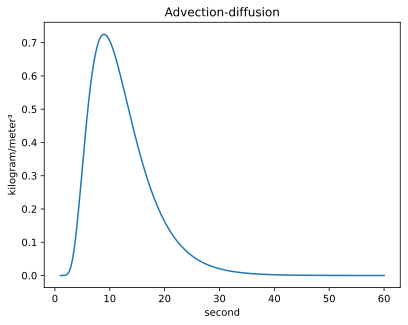

In [5]:

def c(x, t):
    if not isinstance(x, si.Quantity):
        x = x * si.meter
        
    if not isinstance(t, si.Quantity):
        t = t * si.sec
    
    prefactor = (M / (A * np.sqrt(4 * np.pi * D * t)))
    exponent = -((v * t - x)**2 / (4 * D * t)).to_base_units().magnitude
    
    return prefactor * np.exp(exponent)

x_time = np.linspace(1, simulation_time, 400) * si.sec
y_conc = c(3, x_time)

plt.title('Advection-diffusion')
plt.plot(x_time, y_conc)
plt.show()